In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import time
import sys

**In this notebook I'm writing functions to manipulate population data obtained from url here.**  


In [2]:
base_dir = '.'
by_state = pd.read_table(base_dir + '/us.1990_2015.19ages.adjusted.txt', header = None)


In [3]:
#First need to convert the entries to data we can use (by year, population, state, race, and sex)
def sep_vals(entry):
    ''' This function takes a row from the raw data and gets the year, population, race and sex that that row refers to.
    I am not keeping the county/district level data, but you could keep it.'''
    
    entry = entry[0]
    year = int(entry[:4])
    pop = int(entry[19::])
    state = entry[4:6]
    race = entry[13]
    sex = entry[15]

    return [year, pop, state, race, sex]

def count_by_state(df, current_state, year): 
    ''' For a given state and year, this function will give the total population'''
    rel_rows = (df.state==current_state) & (df.year == year)
    new_df = df[rel_rows]
   

    num_total = new_df.population.sum()
    state_pop= [current_state, num_total]

    return num_total

def pop_by_year_for_state(state):
    ''' For a given state, this function will give the population as a function of year (1990-2015)'''
    num = np.arange(26)
    num= 1990+num
    pop = []
    for jk in range(len(num)):
        current_state = state
        year = num[jk]
        state_count = count_by_state(df, current_state, year)
        pop.append([num, state_count])
    return pop

In [4]:
by_state_arr = by_state.values
new_by_state = [sep_vals(by_state_arr[i]) for i in range(len(by_state_arr))]
df = pd.DataFrame(new_by_state, columns=['year', 'population', 'state', 'race', 'sex'])
df.to_csv('population_data.csv')

In [5]:
states = list(set(df.state.values))
year = 2015

st = []
for jk in range(len(states)):
    current_state = states[jk]
    state_count = count_by_state(df, current_state, year)
    st.append([current_state, state_count])

In [7]:
IL_pop = pop_by_year_for_state('IL')
NC_pop = pop_by_year_for_state('NC')

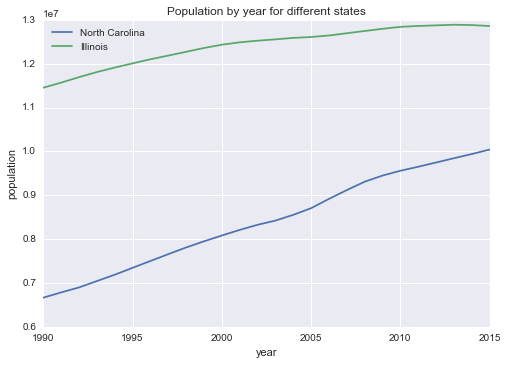

In [15]:
num = np.arange(26)+1990
NC_pop = np.array(NC_pop)
IL_pop = np.array(IL_pop)
fig = plt.figure()
plt.plot(num, NC_pop[:,1], label = "North Carolina")
plt.plot(num, IL_pop[:,1], label = 'Illinois')
plt.legend(loc = 2)
plt.xlabel('year')
plt.ylabel('population')
plt.title('Population by year for different states')
plt.show()

In [16]:
st_df = pd.DataFrame(st, columns = ['state', 'pop'])
st_df.to_csv('state_pop_2015.csv')